# <center> **ASSIGNMENT 4** <center>

For Potential V0 = Constant (5V)

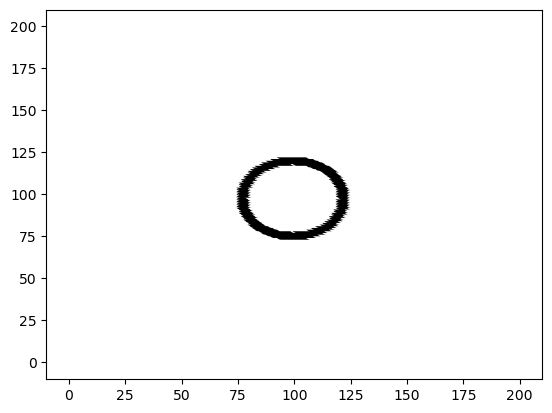

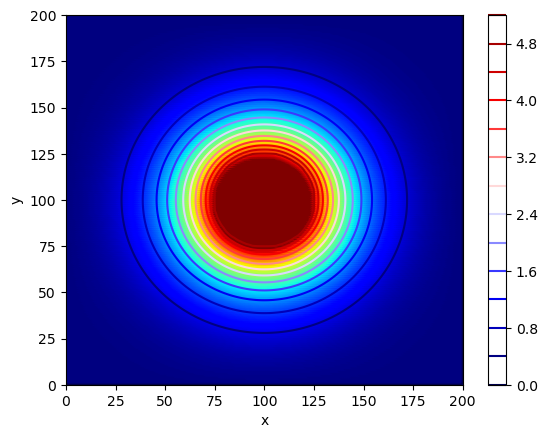

<Figure size 2000x500 with 0 Axes>

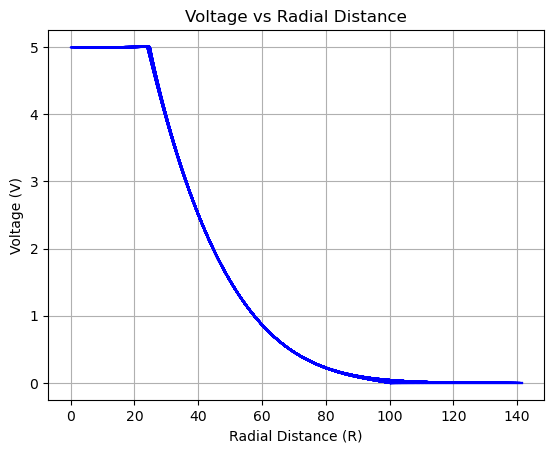

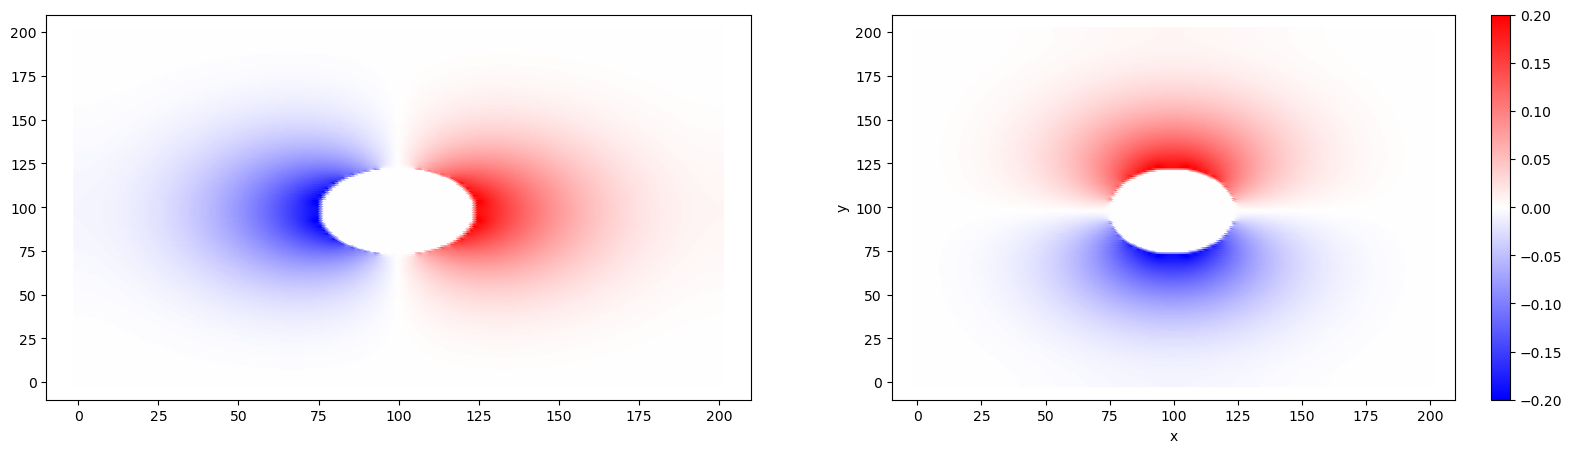

In [1]:
import numpy as np
import matplotlib.pyplot as plt

M, N = 201, 201
d =N//4

# Define the ring parameters
r_outer = d // 2  # outer radius
r_inner = r_outer-5  # inner radius
ring_center = (M // 2, N // 2)  # center of the ring

X, Y = np.meshgrid(range(M), range(N))
R = np.sqrt((X - ring_center[0])**2 + (Y - ring_center[1])**2)  # distance from the center

def set_boundary(V): 
    # set BC values 
    V[(R > r_inner) & (R < r_outer)] = 5.  # ring voltage 
    return V

def relax(V, imax=30): 
    for i in range(imax):
        V[1:-1, 1:-1] = ( V[1:-1,:-2] + V[1:-1,2:] \
                         + V[:-2,1:-1] + V[2:,1:-1] )/4.
        V = set_boundary(V)       
    return V

V = np.zeros((M,N))
V = set_boundary(V)
plt.figure()
plt.scatter(X, Y, c=V.transpose(), cmap='Greys')


plt.show()

V = np.zeros((M,N))
V = set_boundary(V)
V = relax(V, 2001)

plt.figure()
plt.scatter(X, Y, c=V.transpose(), cmap=plt.cm.jet)
plt.contour(X, Y, V.transpose(), 14, cmap=plt.cm.seismic)
plt.colorbar()
plt.xlabel('x'), plt.ylabel ('y')
plt.show()

plt.figure(figsize=(20, 5))

# Plot V vs R
plt.figure()
plt.plot(R, V , color= 'b')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Radial Distance')
plt.grid(True)
plt.show()

Ex, Ey = np.gradient(-V)
Emag = np.sqrt(Ex*Ex + Ey*Ey)


plt.figure(figsize=(20, 5))

#-- Ex field
ax = plt.subplot(121)
plt.scatter(X, Y, c=Ex.transpose(), vmin=-0.2, vmax=0.2, cmap=plt.cm.bwr)

#-- Ey field
ax = plt.subplot(122)
plt.scatter(X, Y, c=Ey.transpose(), vmin=-0.2, vmax=0.2, cmap=plt.cm.bwr)

plt.colorbar()

ax.set_xlabel('x'), ax.set_ylabel ('y')
plt.show()



For variable Potential function
$$
V = K*\sin^2\left(\frac{\theta}{2}\right)
$$


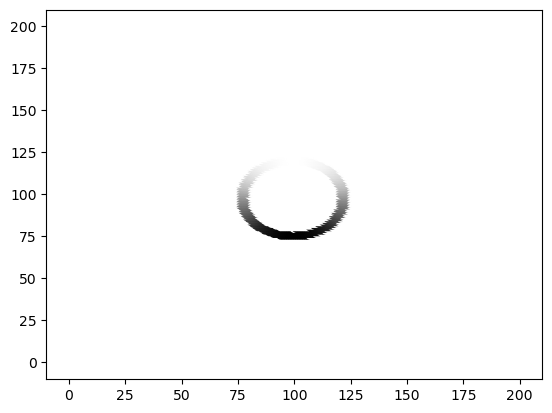

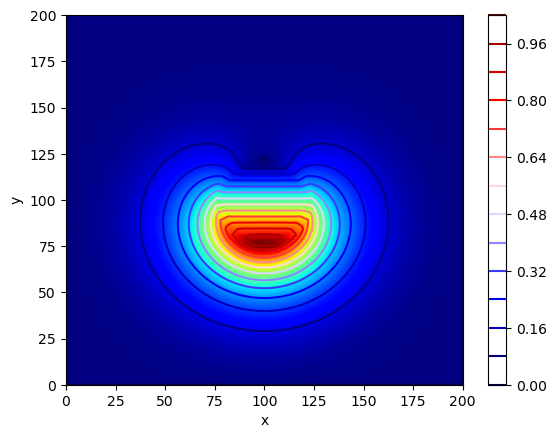

<Figure size 2000x500 with 0 Axes>

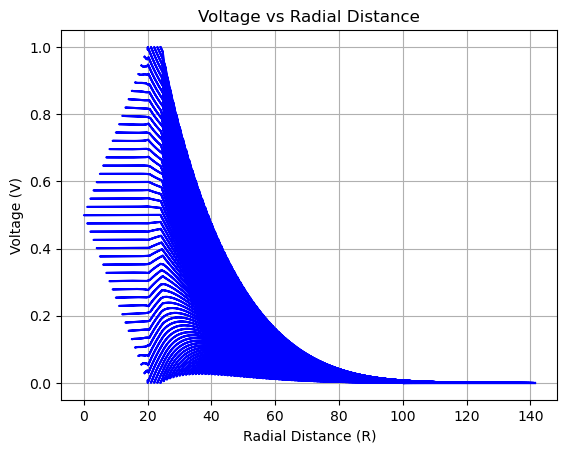

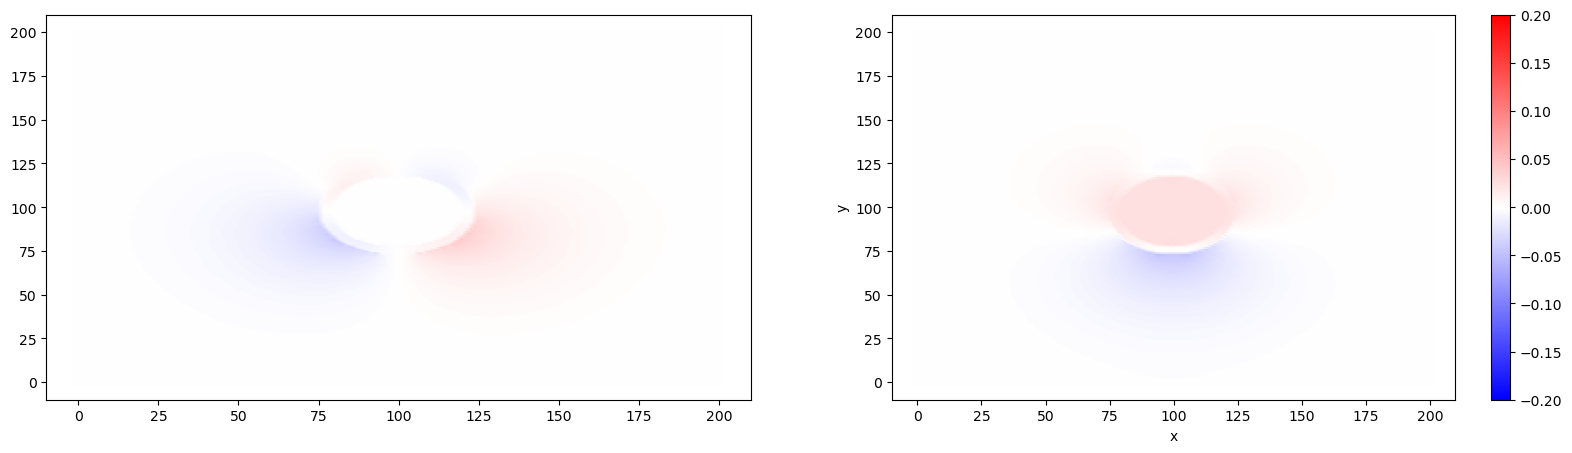

In [2]:
import numpy as np
import matplotlib.pyplot as plt

M, N = 201, 201
d = N//4
K= 1
# Define the ring parameters2
r_outer = d // 2  # outer radius
r_inner = r_outer -5  # inner radius
ring_center = (M // 2, N // 2)  # center of the ring

X, Y = np.meshgrid(range(M), range(N))
R = np.sqrt((X - ring_center[0])**2 + (Y - ring_center[1])**2)  # distance from the center
# Define theta
theta = np.arctan2(Y - ring_center[1], X - ring_center[0])

def set_boundary(V): 
    # set interior BC values 
    V[(R > r_inner) & (R < r_outer)] = K*np.sin(np.arctan2(Y[(R > r_inner) & (R < r_outer)] - ring_center[1], X[(R > r_inner) & (R < r_outer)] - ring_center[0])/2)**2  # ring voltage 
    return V


def relax(V, imax=30): 
    # find self−consistent soln 
    for i in range(imax):
        V[1:-1, 1:-1] = ( V[1:-1,:-2] + V[1:-1,2:] \
                         + V[:-2,1:-1] + V[2:,1:-1] )/4.
        V = set_boundary(V)       
    return V

V = np.zeros((M,N))
V = set_boundary(V)
plt.figure()
plt.scatter(X, Y, c=V.transpose(), cmap='Greys')


plt.show()

V = np.zeros((M,N))
V = set_boundary(V)
V = relax(V, 2001)

# plot potential
plt.figure()
plt.scatter(X, Y, c=V.transpose(), cmap=plt.cm.jet)
plt.contour(X, Y, V.transpose(), 14, cmap=plt.cm.seismic)
plt.colorbar()
plt.xlabel('x'), plt.ylabel ('y')
plt.show()

plt.figure(figsize=(20, 5))

# Plot V vs R
plt.figure()
plt.plot(R, V , color= 'b')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Radial Distance')
plt.grid(True)
plt.show()

Ex, Ey = np.gradient(-V)
Emag = np.sqrt(Ex*Ex + Ey*Ey)


plt.figure(figsize=(20, 5))

#-- Ex field
ax = plt.subplot(121)
plt.scatter(X, Y, c=Ex.transpose(), vmin=-0.2, vmax=0.2, cmap=plt.cm.bwr)

#-- Ey field
ax = plt.subplot(122)
plt.scatter(X, Y, c=Ey.transpose(), vmin=-0.2, vmax=0.2, cmap=plt.cm.bwr)

plt.colorbar()

ax.set_xlabel('x'), ax.set_ylabel ('y')
plt.show()

